## 📚 Disciplina: Tópicos Especiais II (C318) 

### Projeto: 
Locus - Housing Pricing Calculator

### Professor: 
Ricardo Augusto

### Alunos: 
* Alexander Augusto Silva Fernandes
* Aguinaldo de Souza Júnior
* Vanessa Swerts Esteves

## 🤖 Formulação e definição do problema de Machine Learning (ML)

1. Enquadramento do problema: Aprendizagem Supervisionada;
2. Trata-se de um problema de regressão múltipla:
    * Variável de entrada: Características de um imóvel;
    * variável de saída: preço aproximado do imóvel).
3. No futuro, poderá ter mais dados entrando na aplicação, ou seja, seria necessário o ajuste dos dados pelo treinamento online; 
4. A quantidade de dados pode ser acomodada na memória (batch learning).

## 🏗️ Estrutura do Projeto de ML

### 1. Estrutura do projeto   
* Importação das bibliotecas utilizadas
* Importação da base de dados
* Manipulações iniciais nos dados

### 2. Métodos de Amostragem (Sampling)
* Métodos de Amostragem (Sampling Methods)
* Método de amostragem baseado em identificadores únicos do dataset
* Método de Amostragem Aleatória Simples (Sklearn)
* Método de Amostragem Aleatória baseado em Estratificação
* Proporção da Amostragem e Representavidade

### 3. Análise Exploratória de Dados
* Visualizações dos dados
* Investigando correlações

### 4. Preparação dos Dados para Modelagem 
* Limpeza dos dados
* Manipulando features categóricas
* Transformações Customizadas
* Feature Scaling - Pipeline de transformação

### Modelagem
* Mini-Exemplo de Treinamento do modelo
* Avaliação de Desempenho - Evaluation

## 1. Estrutura do Projeto

## 1.1. Importação das bibliotecas utilizadas

In [22]:
# Bibliotecas utilizadas no projeto

import os
import tarfile
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zlib import crc32
import klib

import functions

## 1.2. Importação da base de dados

Este dataset foi criado coletando dados do site de imóveis [Vivareal](https://www.vivareal.com.br/).

1. id: Identificador único do imóvel;
2. type: Tipo de imóvel (Apartamento, Casa, Casa de condomínio, etc);
3. location: Endereço completo do imóvel;
4. area: Area total do imóvel (m²);
5. bedroom: Quantidade de quartos no imóvel;
6. bathroom: Quantidade de banheiros do imóvel;
7. garage: Quantidade de vagas na garagem;
8. condominium: Valor do condomínio pago no imóvel;
9. price: Preço de venda do imóvel (R$);
10. latitude: Medida do quão distante do norte está o imóvel (quanto maior, mais ao norte o imóvel está);
11. longitude: Medida do quão distante do oeste está o imóvel (quanto maior, mais a oeste o imóvel está).

In [23]:
# Importando o dataset (.csv) dentro de um dataframe pandas
df  = pd.read_csv('../datasets/vivareal.csv')

# Informações rápidas sobre o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4836 non-null   int64  
 1   type         4836 non-null   object 
 2   location     4836 non-null   object 
 3   area         4834 non-null   object 
 4   bedroom      3987 non-null   object 
 5   bathroom     4028 non-null   object 
 6   garage       3587 non-null   object 
 7   condominium  619 non-null    object 
 8   price        4623 non-null   object 
 9   latitude     4817 non-null   float64
 10  longitude    4817 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 415.7+ KB


## 1.3 Manipulações iniciais nos dados

In [24]:
# Convertendo variáveis númericas do datarfame de object para float

converter = functions.ObjectToNumber(df)

df['area'] = converter.areaToNumber()
df['bedroom'] = converter.bedroomToNumber()
df['bathroom'] = converter.bathroomToNumber()
df['garage'] = converter.garageToNumber()
df['condominium'] = converter.condominiumToNumber()
df['price'] = converter.priceToNumber()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4836 entries, 0 to 4835
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4836 non-null   int64  
 1   type         4836 non-null   object 
 2   location     4836 non-null   object 
 3   area         4834 non-null   float64
 4   bedroom      3987 non-null   float64
 5   bathroom     4028 non-null   float64
 6   garage       3587 non-null   float64
 7   condominium  619 non-null    float64
 8   price        4623 non-null   float64
 9   latitude     4817 non-null   float64
 10  longitude    4817 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 415.7+ KB


In [25]:
# Descrição estatística do dataframe Pandas
df_stats = df.describe()
df_stats

,id,area,bedroom,bathroom,garage,condominium,price,latitude,longitude
count,4.836000e+03,4.834000e+03,3987.000000,4028.000000,3587.000000,6.190000e+02,4.623000e+03,4817.000000,4817.000000
mean,2.484527e+09,4.248766e+04,2.568096,1.951837,2.010315,7.151801e+03,6.890245e+05,-20.882843,-45.332979
std,2.624397e+08,1.638491e+06,0.976166,1.329000,1.676967,1.070936e+05,2.249100e+06,7.285226,7.456596
min,2.885000e+03,0.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,7.500000e+02,-33.041126,-102.115860
25%,2.503301e+09,6.700000e+01,2.000000,1.000000,1.000000,1.600000e+02,2.200000e+05,-22.632778,-46.588941
50%,2.523058e+09,1.100000e+02,2.000000,2.000000,2.000000,2.500000e+02,3.500000e+05,-22.118815,-46.576769
75%,2.535319e+09,2.500000e+02,3.000000,2.000000,2.000000,4.300000e+02,6.000000e+05,-21.808696,-45.934907
max,2.538954e+09,1.004200e+08,26.000000,26.000000,24.000000,2.500000e+06,7.744000e+07,49.219865,115.914519


### Baseado nos dados estatísticos acima, podemos observar os seguintes exemplos:
* 25% dos imóveis possuem 2 quartos, 1 banheiro, 1 vaga na garagem e 67 m² de area total 
* 50% dos imóveis possuem 2 quartos, 2 banheiros, 2 vagas na garagem e 110 m² de area total 
* 75% dos imóveis possuem 3 quartos, 2 banheiros, 2 vagas na garagem e 250 m² de area total

In [27]:
# Verificando a variável categórica - type
property_types = df["type"].value_counts()
property_types

Apartamento              1735
Casa                     1452
Lote/Terreno              665
Residencial                99
Fazenda/Sítio/Chácara      74
                         ... 
White                       1
Hotel/Motel/Pousada         1
Mobby                       1
Landscape                   1
ART                         1
Name: type, Length: 288, dtype: int64

<ipython-input-31-a6c471b61803>:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax)


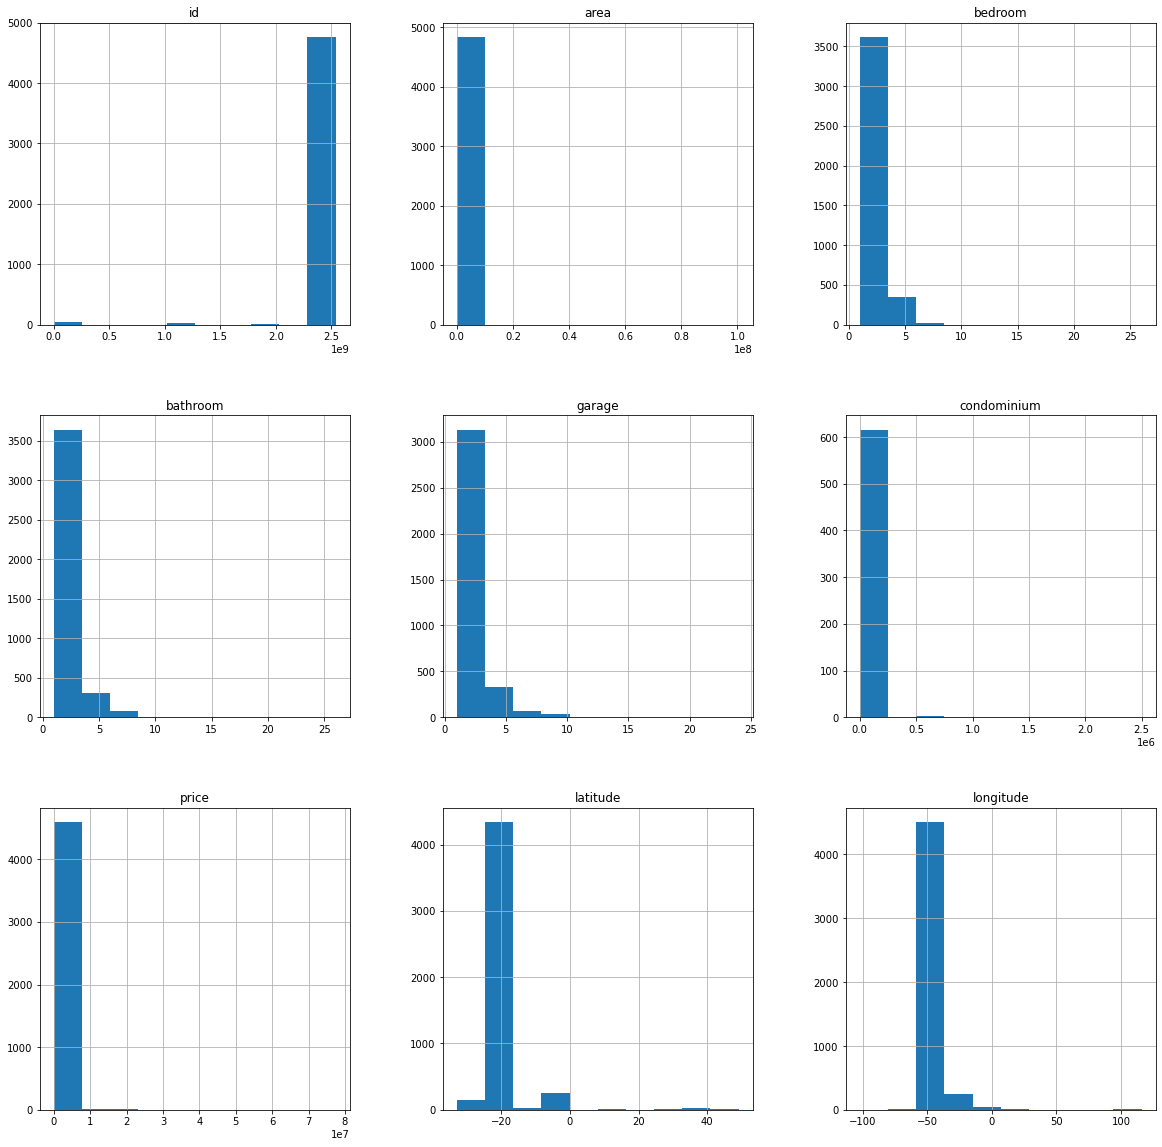

<AxesSubplot:xlabel='garage', ylabel='Density'>

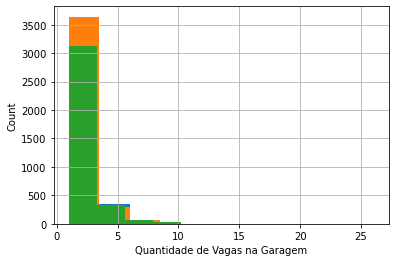

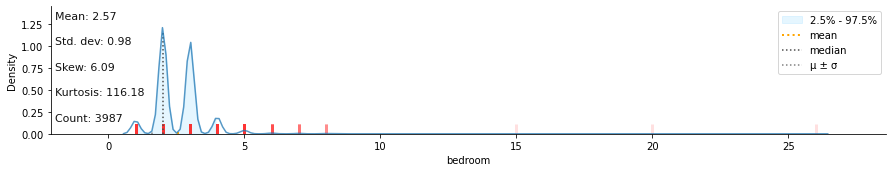

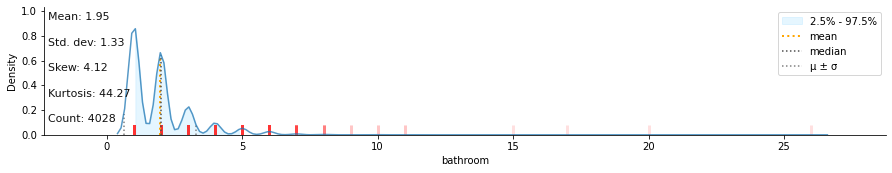

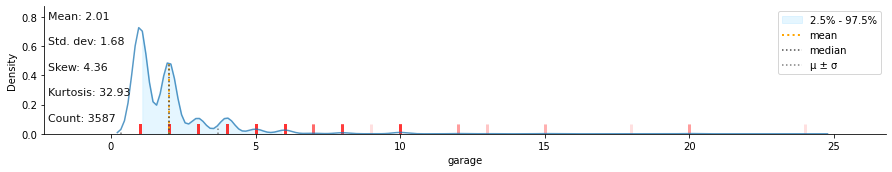

In [31]:
# Configurações de tamanho dos gráficos
fig = plt.figure(figsize = (20,20))
ax = fig.gca()

# Visualizando histogramas de todas as variáveis do dataframe
df.hist(ax=ax)
plt.show()

# Visualizando histogramas das variáveis (features) do dataframe
df['bedroom'].hist()
plt.xlabel('Quantidade de Quartos')
plt.ylabel('Count')

df['bathroom'].hist()
plt.xlabel('Quantidade de Banheiros')
plt.ylabel('Count')

df['garage'].hist()
plt.xlabel('Quantidade de Vagas na Garagem')
plt.ylabel('Count')

# Plotando os gráficos utilizando a biblioteca klib
klib.dist_plot(df['bedroom'])
klib.dist_plot(df['bathroom'])
klib.dist_plot(df['garage'])